In [1]:
import keras
from keras import layers
from keras import losses
from keras import optimizers
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2

Using TensorFlow backend.


In [2]:
base_dir = 'data/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
train_generator = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
    ).flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary',
    )

validation_generator = ImageDataGenerator(
        rescale = 1.255
    ).flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary',
    )


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
         
model.compile(
    loss = losses.binary_crossentropy,
    optimizer = optimizers.rmsprop(lr=0.001),
    metrics = ['accuracy'],
)

In [26]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
)

Epoch 1/30
100/100 [==============================] - 290s 3s/step - loss: 0.7065 - accuracy: 0.5180 - val_loss: 5.2800 - val_accuracy: 0.5241
Epoch 2/30
100/100 [==============================] - 235s 2s/step - loss: 0.6819 - accuracy: 0.5710 - val_loss: 52.0179 - val_accuracy: 0.5329
Epoch 3/30
100/100 [==============================] - 211s 2s/step - loss: 0.7082 - accuracy: 0.6067 - val_loss: 61.5427 - val_accuracy: 0.5527
Epoch 4/30
100/100 [==============================] - 215s 2s/step - loss: 0.6479 - accuracy: 0.6414 - val_loss: 115.6219 - val_accuracy: 0.5432
Epoch 5/30
100/100 [==============================] - 215s 2s/step - loss: 0.6335 - accuracy: 0.6457 - val_loss: 25.5177 - val_accuracy: 0.6269
Epoch 6/30
100/100 [==============================] - 216s 2s/step - loss: 0.6225 - accuracy: 0.6645 - val_loss: 102.4185 - val_accuracy: 0.5928
Epoch 7/30
100/100 [==============================] - 216s 2s/step - loss: 0.5926 - accuracy: 0.6793 - val_loss: 66.1966 - val_accuracy

In [27]:
model.save('cats_and_dogs.h5')

In [5]:
model.load_weights('cats_and_dogs.h5')

In [6]:
test_data = []
for category in os.listdir(test_dir):
    path = os.path.join(test_dir, category)
    for image in os.listdir(path):
        test_data.append(cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE))

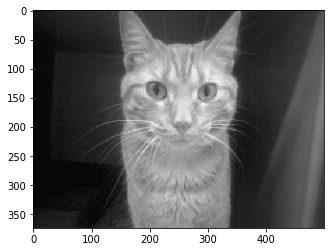

In [8]:
plt.imshow(test_data[0], cmap='gray')


In [46]:
for i in validation_generator:
    test = i[0]
    labels = i[1]
    break

res = model.predict(test)
val = 0
for i in range(len(res)):
    if res[i] == labels[i]:
        val += 1
print(len(res))
print(val)
print('Accuracy: ', str(len(res) / 10 * val), '%')

32
23
Accuracy:  73.60000000000001 %
